In [280]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [281]:
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [283]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [284]:
data['Country'] = data['Country'].apply(lambda x: 'UK and North Ireland' if x == 'United Kingdom of Great Britain and Northern Ireland' else x)

In [285]:
data_2013 = data[data['Year'] == 2013]
data_2013.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
82,Argentina,2013,Developing,76.0,119.0,8,8.28,1001.796332,94.0,0,...,99.0,4.99,94.0,0.1,12976.636420,42539925.0,1.0,0.9,0.823,17.3
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,...,91.0,9.36,91.0,0.1,67792.338600,23117353.0,0.6,0.6,0.933,20.3
130,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,...,95.0,11.14,95.0,0.1,554.715320,8479375.0,1.8,2.0,0.887,15.7
146,Azerbaijan,2013,Developing,72.2,121.0,5,2.14,275.651493,93.0,164,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9


In [286]:
data_2013['Country'].value_counts()

Country
Afghanistan      1
Lithuania        1
Nigeria          1
Niue             1
Norway           1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: count, Length: 193, dtype: int64

# Part a:
### Doing preprocess and visuallize the data.
# AND 
# Part b:
### Conduct the following tests. Include Null and Alternative hypothesis:

# The first ten country with th highest life expectanvy in 2013

C:\Users\hi\AppData\Local\Temp\ipykernel_13304\3664951127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_2013.sort_values('Life expectancy ', ascending=False).iloc[:10]['Country'], y=data_2013['Life expectancy '], palette='plasma')


<Axes: xlabel='Country', ylabel='Life expectancy '>

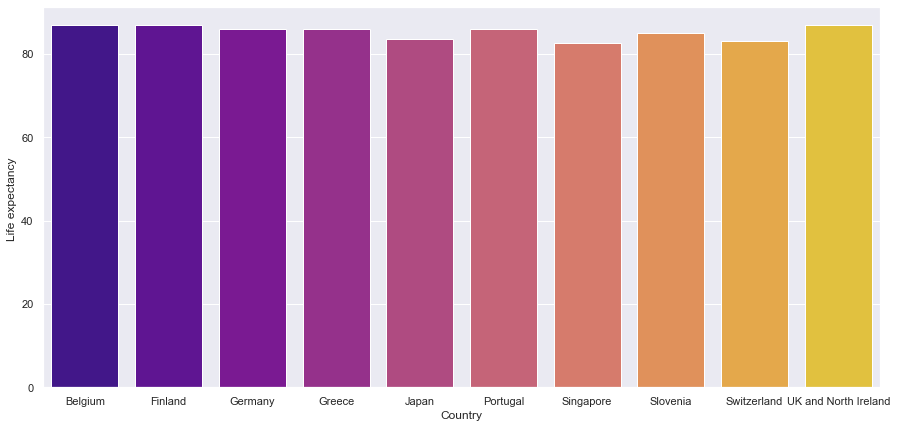

In [287]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_2013.sort_values('Life expectancy ', ascending=False).iloc[:10]['Country'], y=data_2013['Life expectancy '], palette='plasma')

##### Part b:
##### i. Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

##### We will investigate the relationship between status and prevalence of "Hepatits B" (_Two sample t-test_)
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_13304\3347968487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')


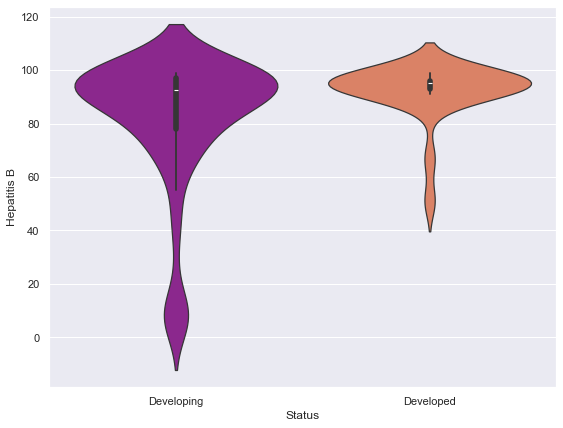

In [288]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Hepatitis B', palette='plasma')
plt.show()

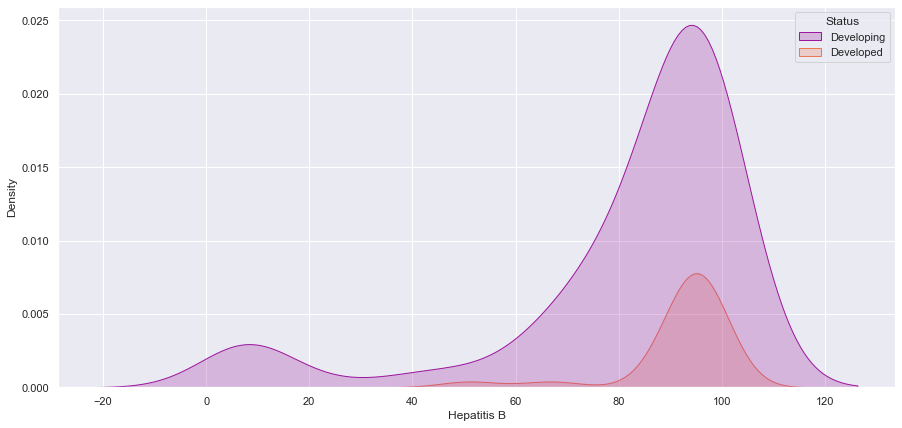

In [289]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Hepatitis B", hue="Status", fill=True, palette='plasma')
plt.show()

In [290]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Hepatitis B'].dropna(), data_2013[data_2013['Status'] == 'Developing']['Hepatitis B'].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 0.05325713745511049
The null hypothesis will be accepted!


##### Part b:
##### ii. Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries).
##### (_Two sample t-test_) 
##### $H_0: \mu_{developed} = \mu_{developing}$
##### $H_1: \mu_{developed} \neq \mu_{developing}$

C:\Users\hi\AppData\Local\Temp\ipykernel_13304\2200567271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')


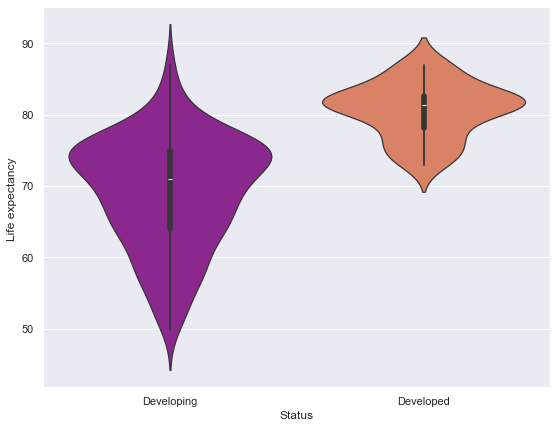

In [291]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data_2013, x='Status', y='Life expectancy ', palette='plasma')
plt.show()

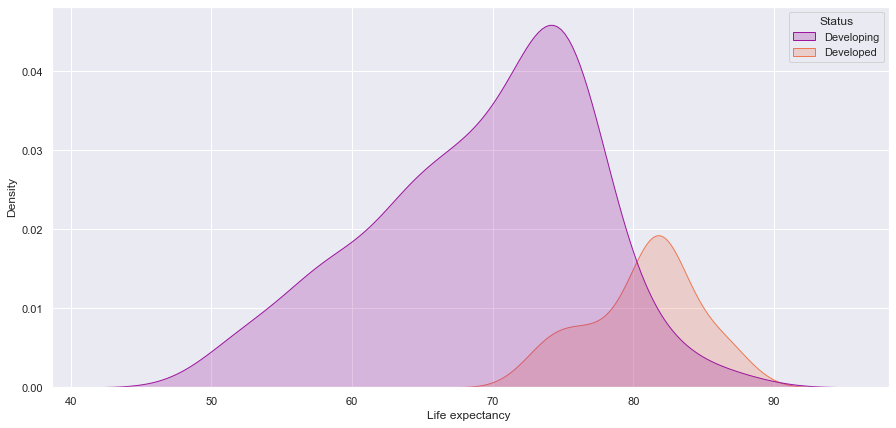

In [292]:
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data_2013, x="Life expectancy ", hue="Status", fill=True, palette='plasma')
plt.show()

In [293]:
alpha = 0.05
stat, p_value = stats.ttest_ind(data_2013[data_2013['Status'] == 'Developed']['Life expectancy '].dropna(), data_2013[data_2013['Status'] == 'Developing']['Life expectancy '].dropna(), equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 5.775206655515912e-14
The null hypothesis will be rejected!


##### Part b:
##### iii. Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.(_ANOVA_)
##### $H_0: \mu_{2000} = \mu_{2001} = \dots = \mu_{2015}$
##### $H_1: \mu_{2000} \neq \mu_{2001} \neq \dots \neq \mu_{2015}$

C:\Users\hi\AppData\Local\Temp\ipykernel_13304\1112383808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')


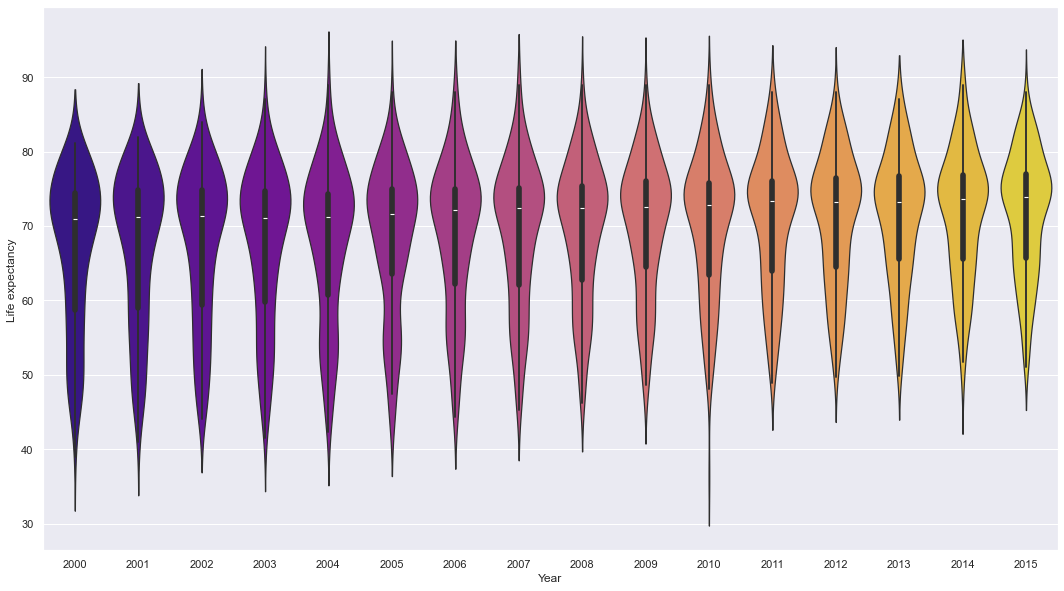

In [294]:
plt.figure(figsize=(40, 10))
plt.subplot(121), sns.violinplot(data=data, x='Year', y='Life expectancy ', palette='plasma')
plt.show()

In [295]:
alpha = 0.05
stat, p_value = stats.f_oneway(data[data['Year'] == 2000]['Life expectancy '].dropna(), data[data['Year'] == 2001]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2002]['Life expectancy '].dropna(), data[data['Year'] == 2003]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2004]['Life expectancy '].dropna(), data[data['Year'] == 2005]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2006]['Life expectancy '].dropna(), data[data['Year'] == 2007]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2008]['Life expectancy '].dropna(), data[data['Year'] == 2009]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2010]['Life expectancy '].dropna(), data[data['Year'] == 2011]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2012]['Life expectancy '].dropna(), data[data['Year'] == 2013]['Life expectancy '].dropna(), 
                               data[data['Year'] == 2014]['Life expectancy '].dropna(), data[data['Year'] == 2015]['Life expectancy '].dropna())
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 4.508349816377376e-12
The null hypothesis will be rejected!


<Axes: xlabel='Hepatitis B', ylabel='Life expectancy '>

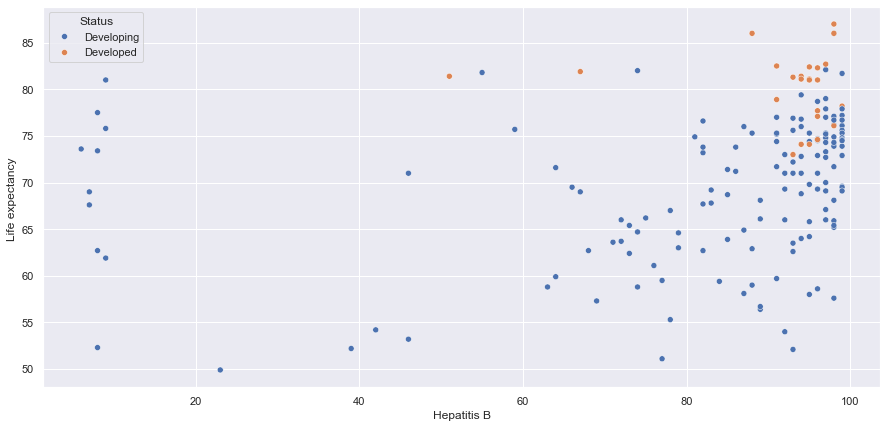

In [296]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=data_2013, x='Hepatitis B', y='Life expectancy ', hue='Status')

<Axes: xlabel='Alcohol', ylabel='Life expectancy '>

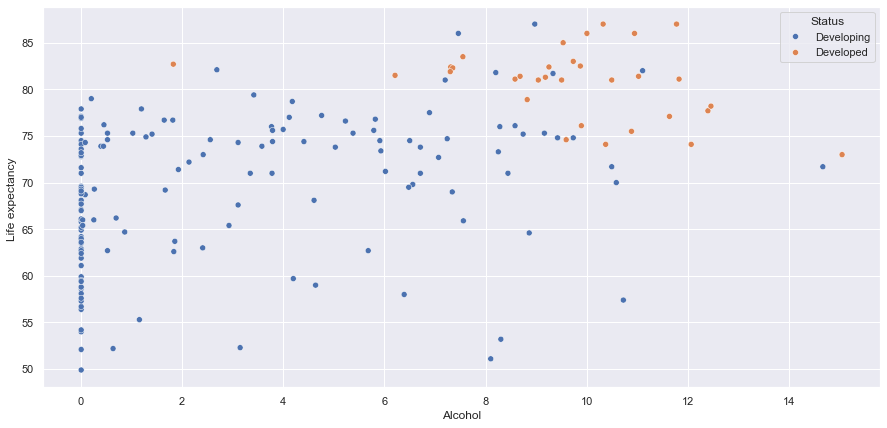

In [297]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=data_2013, x='Alcohol', y='Life expectancy ', hue='Status')

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

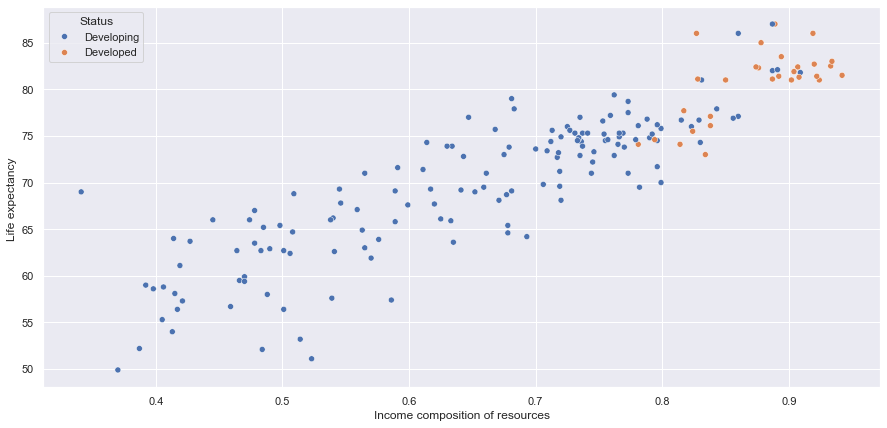

In [298]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=data_2013, x='Income composition of resources', y='Life expectancy ', hue='Status')

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

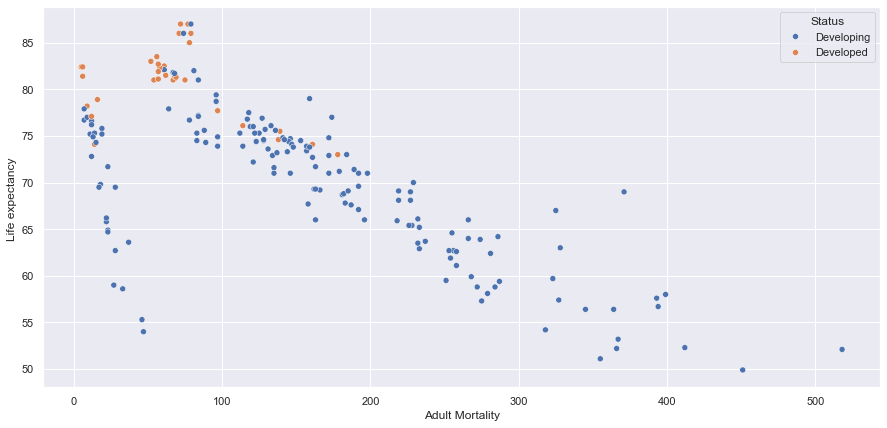

In [299]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=data_2013, x='Adult Mortality', y='Life expectancy ', hue='Status')

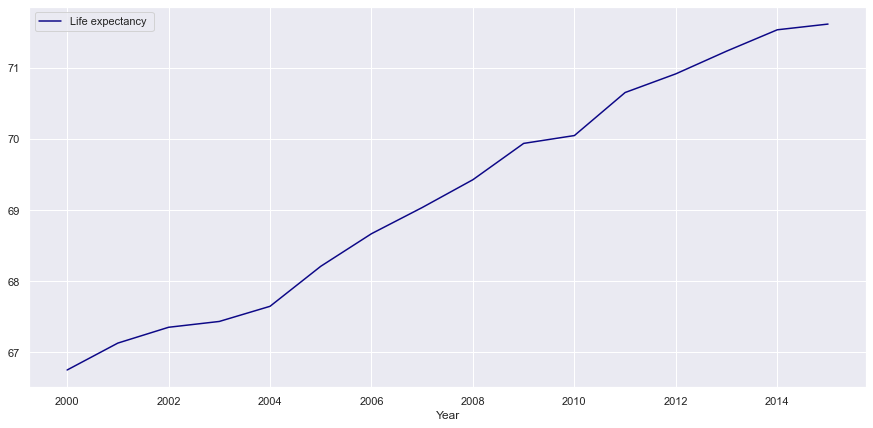

In [300]:
data.select_dtypes(include='number').groupby('Year').mean().plot(kind='line', y='Life expectancy ', figsize=(15, 7), 
                                                                 colormap='plasma')
plt.legend() 
plt.show()

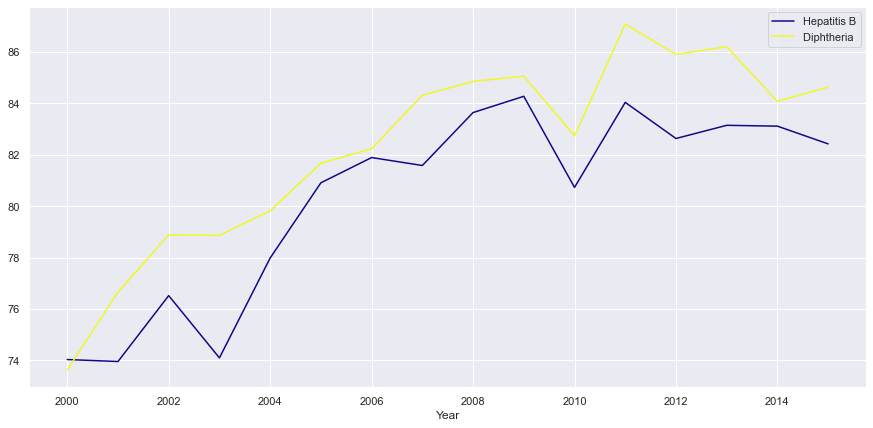

In [301]:
data.select_dtypes(include='number').groupby('Year').mean().plot(kind='line', y=['Hepatitis B', 'Diphtheria '], figsize=(15, 7), 
                                                                 colormap='plasma')
plt.legend() 
plt.show()

# Part c:
### Calculate the correlation between each variable and the target variable ("Life expectancy")

<Axes: >

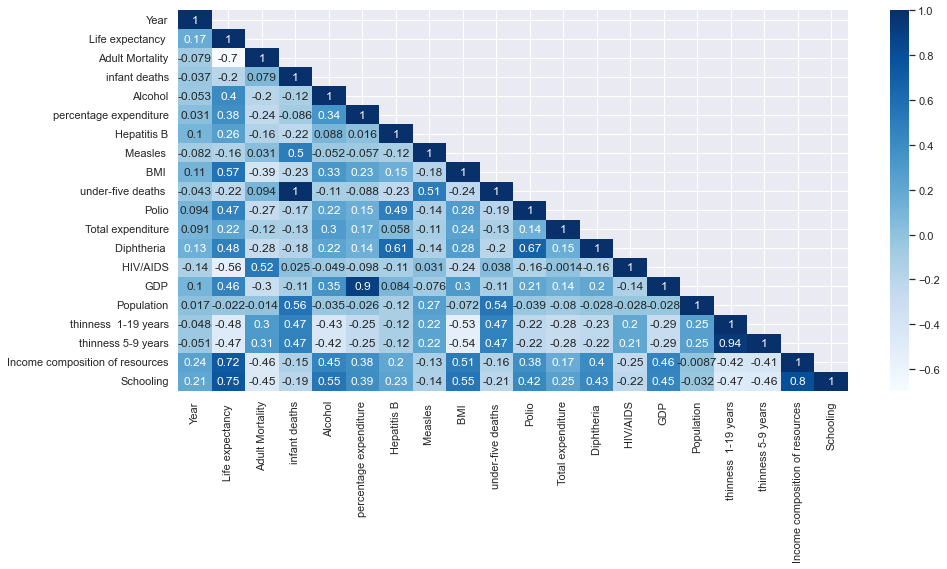

In [302]:
corr_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(15, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

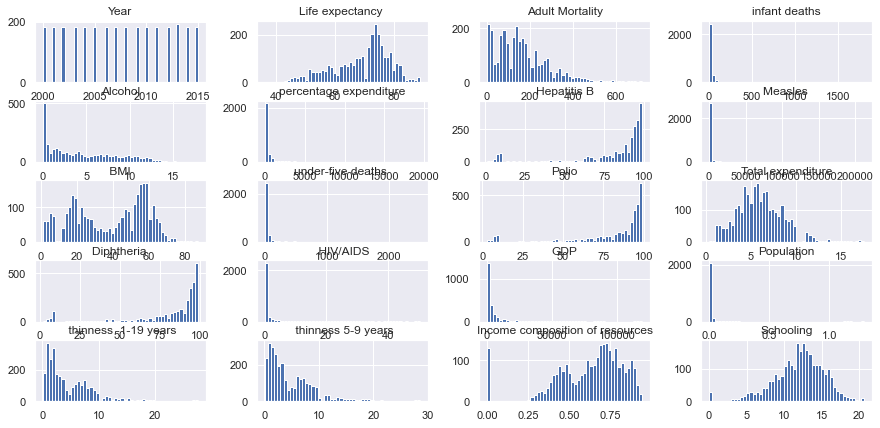

In [303]:
data.hist(bins=50, figsize=(15, 7))

In [304]:
# omitting outlier

def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            upper_bound = data[column].mean() + 3 * data[column].std()
            lower_bound = data[column].mean() - 3 * data[column].std()
            data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [305]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
countries = pd.DataFrame(data['Country'], columns=['Country'])
countries = oh_encoder.fit_transform(countries).toarray()
newCountry = pd.DataFrame(countries, columns=oh_encoder.categories_, index=data.index)
data = data.drop(columns=['Country'])
data = pd.concat([data, newCountry], axis=1)
data.rename(columns=''.join, inplace=True)


data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
